In [157]:
from sklearn.datasets import load_breast_cancer

In [158]:
cancer = load_breast_cancer()

In [159]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [160]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [161]:
X = cancer.data
X.shape

(569, 30)

In [162]:
y = cancer.target
len(y)

569

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    stratify=y, 
                                                    random_state=42)

In [164]:
X_train.shape

(426, 30)

In [165]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [166]:
print(f'Training Score:{tree.score(X_train, y_train)*100}%')
print(f'Test Score:{tree.score(X_test, y_test)*100}%')

Training Score:100.0%
Test Score:93.7062937062937%


In [167]:
from sklearn.tree import DecisionTreeClassifier
treeWithDepth4 = DecisionTreeClassifier(max_depth=4, random_state=0)
treeWithDepth4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [168]:
print(f'Training Score:{treeWithDepth4.score(X_train, y_train)*100}%')
print(f'Test Score:{treeWithDepth4.score(X_test, y_test)*100}%')

Training Score:98.82629107981221%
Test Score:95.1048951048951%


In [169]:
from sklearn.tree import export_graphviz
export_graphviz(tree,
                out_file='tree1.dat',
                class_names=['malignant','benign'],
                feature_names=cancer.feature_names,
                impurity=False,
                filled=True
                )

In [170]:
# import graphviz
# with open('tree1.dat') as f:
#     graphdata = f.read()
# graphviz.Source(graphdata)

In [171]:
tree.feature_importances_

array([0.        , 0.00752597, 0.        , 0.        , 0.00903116,
       0.        , 0.00752597, 0.        , 0.        , 0.        ,
       0.00975731, 0.04630969, 0.        , 0.00238745, 0.00231135,
       0.        , 0.        , 0.        , 0.        , 0.00668975,
       0.69546322, 0.05383211, 0.        , 0.01354675, 0.        ,
       0.        , 0.01740312, 0.11684357, 0.01137258, 0.        ])

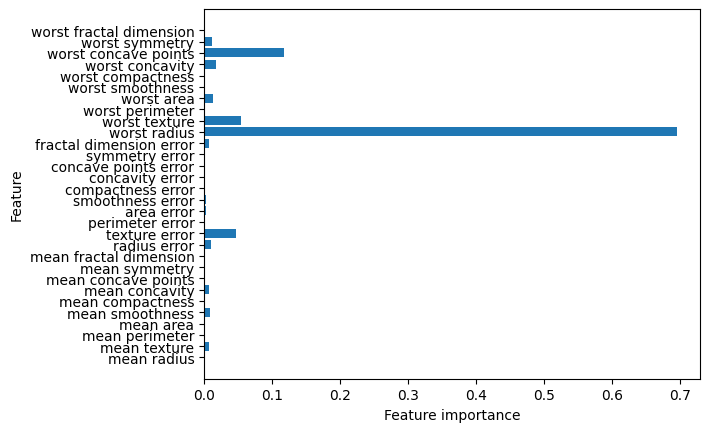

In [172]:
import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]

    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)

    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(tree)


In [173]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import mglearn



In [174]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [175]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)


RandomForestClassifier(n_estimators=5, random_state=2)

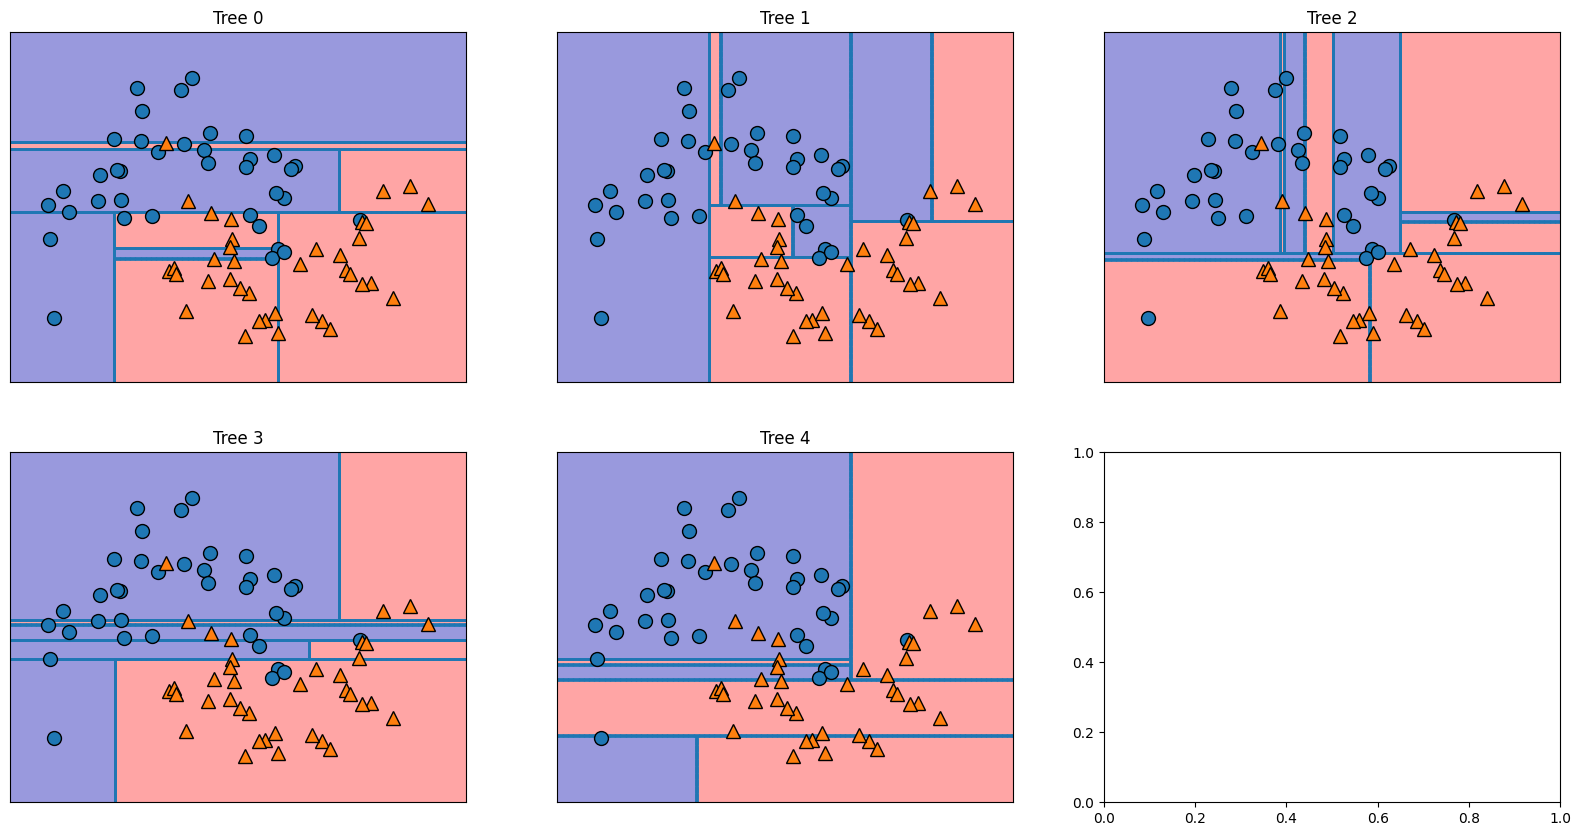

In [176]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Plot the trees
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

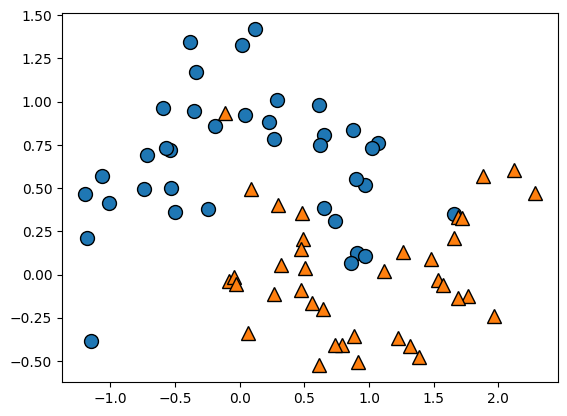

In [177]:
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)


In [178]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [179]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


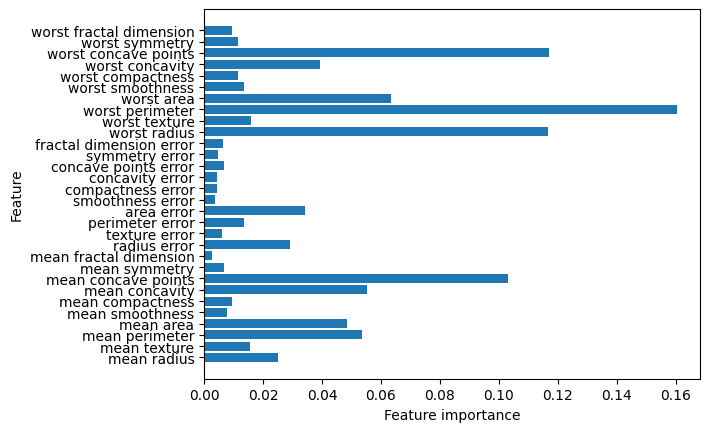

In [180]:
plot_feature_importances_cancer(forest)

In [181]:
from sklearn.ensemble import GradientBoostingClassifier

In [182]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)



In [183]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [184]:
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [185]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


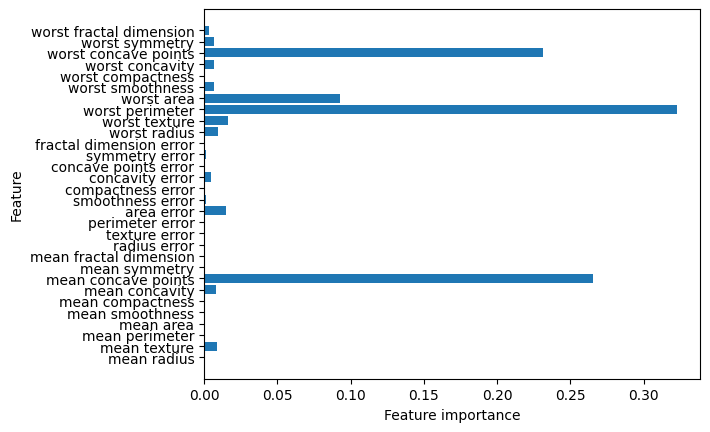

In [186]:
plot_feature_importances_cancer(gbrt)

In [187]:
gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.958


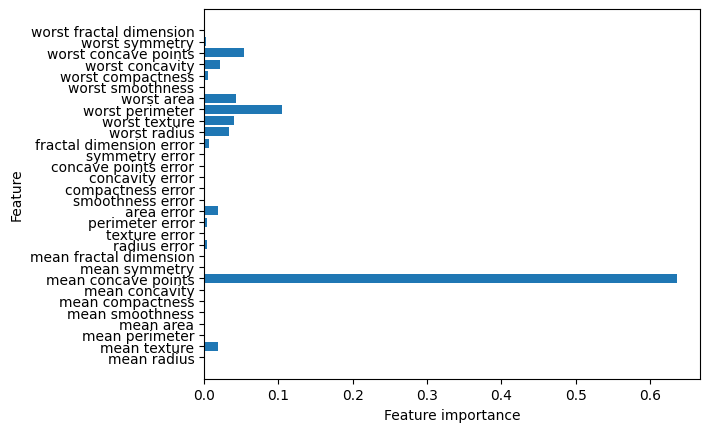

In [188]:
plot_feature_importances_cancer(gbrt)